In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../csvs/shuffled_data.csv')
df

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,73,0,0,183,517,1,2,99,0,1.4,3,0.0,1
1,67,1,2,153,220,1,2,181,1,5.7,2,2.0,1
2,70,1,0,121,316,0,0,143,0,0.4,2,1.0,0
3,31,1,0,101,270,0,0,133,1,2.2,1,1.0,0
4,37,0,3,120,215,0,0,170,0,0.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,76,1,0,102,240,0,1,170,0,0.9,2,1.0,0
1299,73,1,0,143,351,1,2,174,1,1.8,2,3.0,1
1300,52,1,4,128,255,0,0,161,1,0.0,1,1.0,1
1301,67,0,1,190,297,1,2,133,0,1.6,2,1.0,1


In [6]:
y = df['target']
y

0       1
1       1
2       0
3       0
4       0
       ..
1298    0
1299    1
1300    1
1301    1
1302    0
Name: target, Length: 1303, dtype: int64

In [7]:
x = df.drop('target', axis=1)
x

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,73,0,0,183,517,1,2,99,0,1.4,3,0.0
1,67,1,2,153,220,1,2,181,1,5.7,2,2.0
2,70,1,0,121,316,0,0,143,0,0.4,2,1.0
3,31,1,0,101,270,0,0,133,1,2.2,1,1.0
4,37,0,3,120,215,0,0,170,0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,76,1,0,102,240,0,1,170,0,0.9,2,1.0
1299,73,1,0,143,351,1,2,174,1,1.8,2,3.0
1300,52,1,4,128,255,0,0,161,1,0.0,1,1.0
1301,67,0,1,190,297,1,2,133,0,1.6,2,1.0


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
def run(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model} Accuracy: {accuracy:.4f}")
    return accuracy

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395
DecisionTreeClassifier(max_depth=1) Accuracy: 0.7395

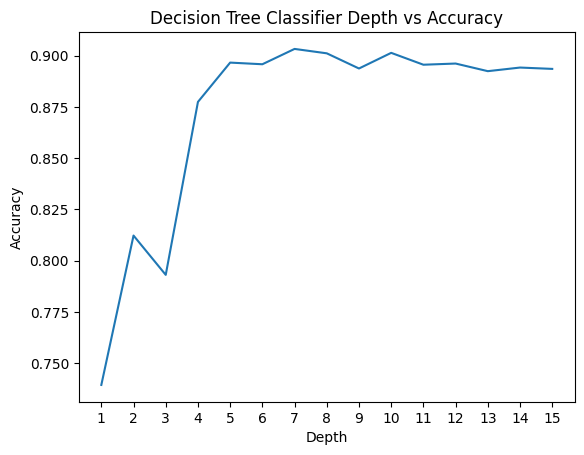

In [10]:
# just decision trees
# choose best max depth
depths = np.linspace(1, 15, 15).astype(int)
print(depths)
accuracies = [0]*15
for i, depth in enumerate(depths):
    acc_sum = 0
    for j in range(100):
        acc_sum += run(DecisionTreeClassifier(max_depth=depth))
    acc_score = acc_sum / 100
    accuracies[i] = acc_score
print(accuracies)
fig,ax = plt.subplots(1)
plt.xticks(depths)
plt.title("Decision Tree Classifier Depth vs Accuracy")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
ax.plot(depths, accuracies)
print(np.argmax(accuracies))
# most accurate max depth is 7


In [11]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
# visualization packages (pip install six pydotplus graphviz, conda install graphviz)
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

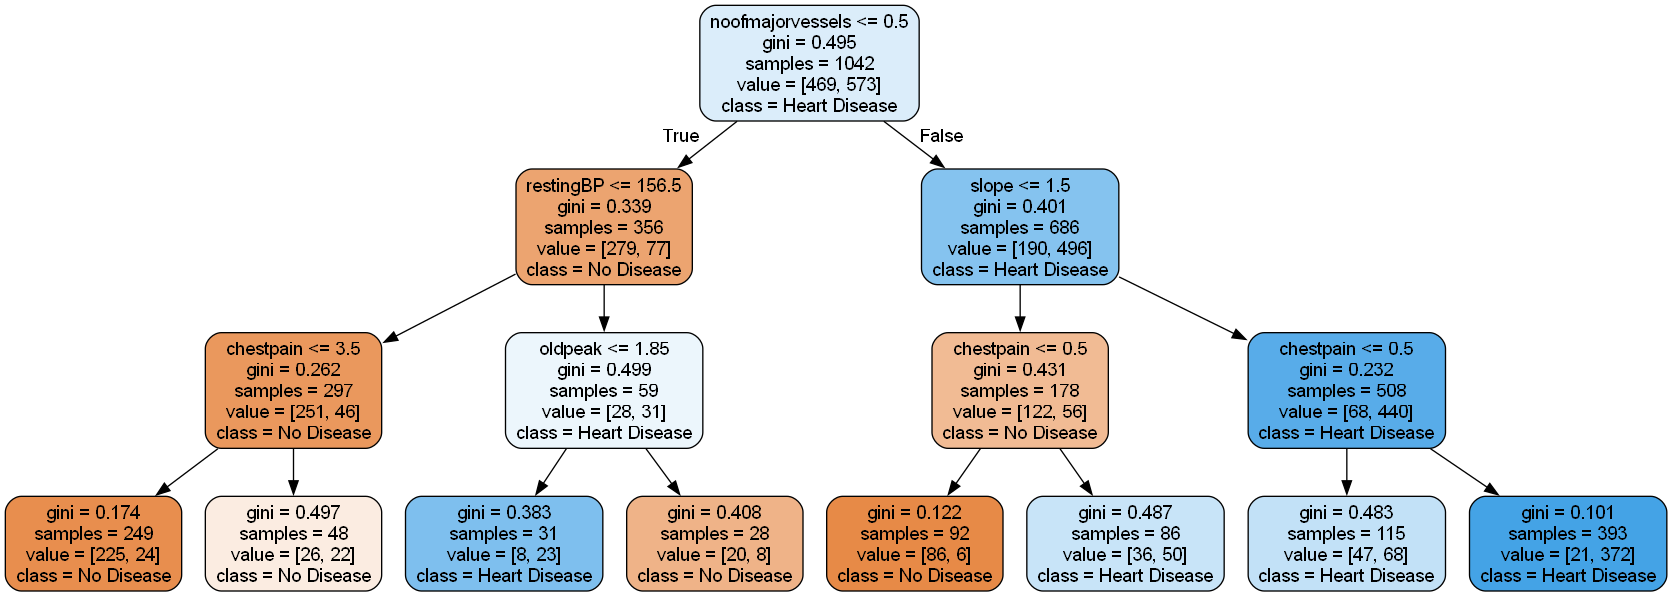

In [15]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=x.columns, 
                class_names=['No Disease', "Heart Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

[ 1  2  3  4  5  6  7  8  9 10 11]
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9042
DecisionTreeClassifier(max_depth=7) Accuracy: 0.8966
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9004
DecisionTreeClassifier(max_depth=7) Accuracy: 0.8966
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9080
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9042
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9080
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9080
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9004
DecisionTreeClassifier(max_depth=7) Accuracy: 0.8966
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9004
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9042
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9004
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9042
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9042
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9042
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9080
DecisionTreeClassifier(max_depth=7) Accuracy: 0.9042
DecisionTre

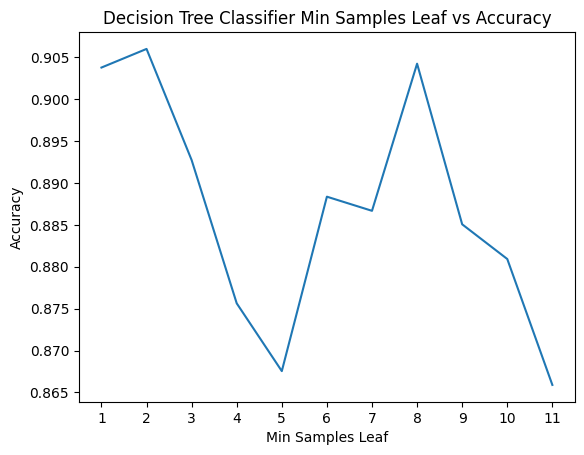

In [16]:
# lets do the same for min samples leaf
leaves = np.linspace(1, 11, 11).astype(int)
print(leaves)
accuracies = [0]*11
for i, leaf in enumerate(leaves):
    acc_sum = 0
    for j in range(100):
        acc_sum += run(DecisionTreeClassifier(max_depth=7, min_samples_leaf=leaf))
    acc_score = acc_sum / 100
    accuracies[i] = acc_score
print(accuracies)
fig,ax = plt.subplots(1)
plt.xticks(depths)
plt.title("Decision Tree Classifier Min Samples Leaf vs Accuracy")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
ax.plot(leaves, accuracies)
print(np.argmax(accuracies))
# should set min_samples_leaf = 2

In [17]:
dt = DecisionTreeClassifier(max_depth = 7, min_samples_leaf=2)
run(dt)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2) Accuracy: 0.9119


0.9118773946360154

In [18]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [19]:
# best_parameters = {'max_depth': np.arange(2,11), 'min_samples_leaf': np.arange(2,11)}
# decision_tree = DecisionTreeClassifier(criterion='gini') # for information gain and entropy
# model = GridSearchCV(estimator=decision_tree, param_grid=best_parameters, n_jobs=-1, verbose=1, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=17))
# model.fit(x_train, y_train)
# model.best_params_
dt = DecisionTreeClassifier()
params = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20, 30, 40],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(x_train, y_train)
grid_search.best_params_


Fitting 4 folds for each of 330 candidates, totalling 1320 fits


{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}

In [20]:
def run(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"{model} Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    return accuracy, f1, precision, recall

In [21]:
models = [GaussianNB(), SVC(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), XGBClassifier(use_label_encoder=False, eval_metric='logloss')]

for i in models:
    run(i)

GaussianNB() Accuracy: 0.8467, F1 Score: 0.8571, Precision: 0.8955, Recall: 0.8219
SVC() Accuracy: 0.7395, F1 Score: 0.7500, Precision: 0.8095, Recall: 0.6986
LogisticRegression() Accuracy: 0.8352, F1 Score: 0.8522, Precision: 0.8552, Recall: 0.8493
DecisionTreeClassifier() Accuracy: 0.9042, F1 Score: 0.9123, Precision: 0.9353, Recall: 0.8904


c:\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier() Accuracy: 0.9349, F1 Score: 0.9412, Precision: 0.9510, Recall: 0.9315
KNeighborsClassifier() Accuracy: 0.7433, F1 Score: 0.7729, Precision: 0.7651, Recall: 0.7808
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...) Accuracy: 0.9272, F1 Score: 0.9338, Precision: 0.

c:\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [23:00:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
